# Resolvendo Problemas de Engenharia de Bioprocessos e Biotecnologia em *Python*
---


## Sistemas de Equações Não Lineares

Considerando o sistema:


$F_{(X)} =
\begin{cases}
f_{1 (X)} = f_{1} (x_1, x_2, \cdots +, x_n) = 0 \\
f_{2 (X)} = f_{2} (x_1, x_2, \cdots +, x_n) = 0 \\
\vdots \\
f_{m (X)} = f_{m} (x_1, x_2, \cdots +, x_n) = 0
\end{cases}$
(Sistema 1)


E a sequência de pontos:


$\{X^{(0)}, X^{(1)}, \cdots, X^{(k)}, \cdots, X^* \}$

Onde:

$X^{(k)} = (x_1, x_2, \cdots, x_n)^{(k)}$


É possível aplicar processos iterativos a um ponto da sequência para que este resulte no próximo. Dessa maneira, a última iteração resultará no último ponto da sequência ($X^*$).


Para sistemas de equações não-lineares como o Sistema 1, a aplicação da iteração da Equação 1 aos pontos $X^{(k)}$ resulta na solução do sistema: o ponto $X^*$.


$J_{(X^k)} \cdot X^{(k+1)} = -F_{(X^k)}$ (Equação 1)

onde $J$ é a matriz jacobiana do sistema:

$J_{(X)} = \begin{pmatrix}
  \frac{\partial f_{1(X)}}{\partial x_1} & \frac{\partial f_{1(X)}}{\partial x_2} & \cdots & \frac{\partial f_{1(X)}}{\partial x_n}  \\
  \frac{\partial f_{2(X)}}{\partial x_1} & \frac{\partial f_{2(X)}}{\partial x_2} & \cdots & \frac{\partial f_{2(X)}}{\partial x_n}  \\
  \vdots  & \vdots  & \ddots & \vdots\\
  \frac{\partial f_{n(X)}}{\partial x_1} & \frac{\partial f_{n(X)}}{\partial x_2} & \cdots & \frac{\partial f_{n(X)}}{\partial x_n}
 \end{pmatrix}$
 (Matriz 1)


In [ ]:
##### Exemplo do uso da biblioteca NumPy para resolução de sistemas de equações lineares #####

import numpy as np

A = np.array([[1,2],[3,5]])
B = np.array([1,2])
X = np.linalg.solve(A,B)

print("X = ", X)

---
# Exemplo de Aplicação 1

Considerando uma operação envolvendo amônia em sua forma gasosa, que ocorre a pressão de 56 atm e temperatura de 450 K, deseja-se calcular o volume molar do gás. Empregue a equação de Van der Waals, adequada para operações em altas pressões.


Equação de Van der Waals:

$\begin{cases}
(P + \frac{a}{V^2}) \cdot (V - b) = R \cdot T \\
 a = \frac{27}{64} \cdot (\frac{R^2 \cdot T_c^2}{P_c}) \\
 b = \frac{R \cdot T_c}{8 \cdot P_c}
 \end{cases}$
 (Sistema 2)


São conhecidos os valores de temperatura e pressão críticas do gás, dados abaixo:


$T_c = 405,5 \text{ } K \\
P_c = 111,3 \text{ } atm \\
R = 0,08206 \text{ } atm \cdot l \cdot gmol^{-1} \cdot K^{-1}$


Para a solução do Sistema 2, dado pela Equação de Van der Waals, será necessária a aplicação de um método iterativo. Esse processo exige um palpite como valor inicial, o que pode ser dado pela Equação dos Gases Ideais, mesmo que a operação estudada não envolva um gás ideal.


A Equação dos Gases Ideais é dada por:

$P \cdot V = n \cdot R \cdot T$
(Equação 2)


Então, obtendo-se o palpite inicial com base na Equação 2, este é aplicado a iterações para a resolução do Sistema 2.

In [ ]:
########## EXEMPLO DO LIVRO DE KWONG 2016 ##########

import numpy as np
from scipy.optimize import fsolve

#--------------------------------------------------------#
#|          Definicao das Variaveis Conhecidas          |#
#--------------------------------------------------------#
#Constante Universal dos Gases
R = 0.08206         ## atm.l/(gmol.K)

#Caracteristicas do Gas Amonia
Tc = 405.5          ## K
Pc = 111.3          ## atm

#Caracteristicas do Processo
T = 450             ## K
P = 56              ## atm

#--------------------------------------------------------#
#|      Equacao dos Gases Ideais e Palpite Inicial      |#
#--------------------------------------------------------#
def EGI():
  # PV = nRT
  # Volume molar = V/n
  Vmol = R * T / P
  return Vmol

#--------------------------------------------------------#
#|               Equacao de Van der Waals               |#
#--------------------------------------------------------#
def VDW(V):
  a = (27/64) * ((R**2) * (Tc**2) / Pc)
  b = R * Tc / (8 * Pc)

  # (P + a/V^2) (V - b) = RT
  vdw = (P + (a/(V**2))) * (V-b) - R * T
  return vdw

Vmol = EGI()
Solucao = fsolve(VDW, Vmol)

print("O volume molar de amônia nas condições descritas será de ",
      "%.4f"%Solucao[0], "l/gmol.")


O volume molar de amônia nas condições descritas será de  0.5749 l/gmol.


---
# Exemplo de Aplicação 2

Huang (2010) conduziu um estudo cinético e investigou o crescimento de *Escherichia coli* O157:H7 em carne bovina a diferentes temperaturas. O autor, então, propôs algumas modificações aos modelos cinéticos previamente disponíveis na literatura. O resultado foi uma modelagem mais condizente com o comportamento verdadeiro da população bacteriana estudada.


Na solução proposta por Huang (2010), é possível observar o progresso da concentração de bactérias ao longo do tempo, passando pelas fases de crescimento lag (latência), log (crescimento exponencial) e estacionária. Com a finalidade de elaborar um modelo que se adapte bem à progressão das fases, é inserido à equação de crescimento ($Y_{(t)}$) um coeficiente de transição da fase lag ($\alpha$), através de uma função de transição ($B_{(t)}$).


Este coeficiente de transição define a passagem da fase lag para a fase exponencial. Contudo, quando há uma quantidade pequena de dados disponíveis para a construção da curva, é difícil determinar o valor de $\alpha$ através de uma regressão não linear. Por isso, em alguns casos, Huang (2010) sugere a adoção de um valor arbitrário de $\alpha = 4$, que permite uma transição de fases rápida, porém suave. O autor também ressalta que a adoção deste valor arbitrário tende a gerar erros mínimos, portanto não apresenta impacto relevante na maioria dos casos de estudo.


De acordo com Huang (2010), o crescimento bacteriano pode ser descrito pelo seguinte sistema:

$\begin{cases}
 Y = Y_0 + Y_{máx} -
 ln [e^{Y_0} + (e^{Y_{máx}} - e^{Y_0}) \cdot
 e^{-\mu_{máx} B_{(t)}}] \\
 B_{(t)} = t + \frac{1}{\alpha} \cdot ln \left[\frac{1 + e^{-\alpha (t - \lambda)}}{1 + e^{\alpha \lambda}} \right]
 \end{cases}$
 (Sistema 3)


Onde:

- $Y$ é o logaritmo natural da contagem de unidades formadoras de colônia observadas, por massa de amostra analisada, $ln (UFC/g)$;
- $Y_0$ e $Y_{máx}$ são as concentrações celulares inicial e máxima, respectivamente;
- $\mu_{máx}$ é a taxa de crescimento específica;
- $B_{(t)}$ é a função de transição;
- $\alpha$ é o coeficiente de transição da fase lag;
- $\lambda$ é a duração da fase lag;
- $t$ é o tempo decorrido de cultivo.


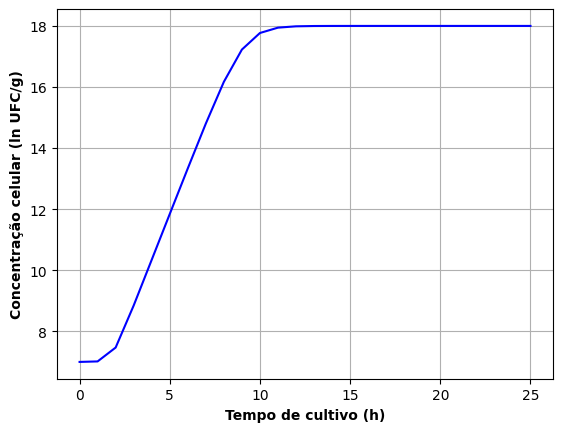

In [ ]:
########## EXEMPLO DO ARTIGO DE HUANG (2010) ##########

import numpy as np
import matplotlib.pyplot as plt

#--------------------------------------------------------#
#|               Definicao das Constantes               |#
#--------------------------------------------------------#
# Valores adotados com base nos dados de Huang (2010)
mimax = 1.5
alfa = 4
Lambda = 1.77
Y0 = 7
Ymax = 18
#--------------------------------------------------------#
#|                   Equacao de Huang                   |#
#--------------------------------------------------------#
def crescimento (t):
  B = t+(1/alfa)* np.log((1+np.exp(-alfa*(t-Lambda)))/(1+np.exp(alfa*Lambda)))
  Y = Y0+Ymax- np.log(np.exp(Y0)+(np.exp(Ymax)-np.exp(Y0))*np.exp(-mimax*B))
  return Y

#--------------------------------------------------------#
#|                  Solucao do Sistema                  |#
#--------------------------------------------------------#
tempo = range(26)
Concentracoes = []
for t in tempo:
  Yi = crescimento(t)
  Concentracoes.append(Yi)

#--------------------------------------------------------#
#|                 Plotagem do Grafico                  |#
#--------------------------------------------------------#
plt.plot(tempo, Concentracoes, "b-")
plt.xlabel("Tempo de cultivo (h)", weight="bold")
plt.ylabel("Concentração celular (ln UFC/g)", weight="bold")
plt.grid(True)
plt.show()
